In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# OP_N
rows_interval = 8
rows_min = rows_interval
rows_max = 256
rows = int(rows_max/rows_interval) - int(rows_min/rows_interval) + 1

columns_interval = rows_interval
columns_min = rows_min
columns_max = rows_max
columns = int(columns_max/columns_interval) - int(columns_min/columns_interval) + 1

batch_count = 1000

operation = "op_n"
precision = 64

op_n_median_array = np.zeros((rows, columns))

In [3]:
# load data
for i, n in enumerate(range(rows_min, rows_max + 1, rows_interval)):
    for j, m in enumerate(range(columns_min, columns_max + 1, columns_interval)):
        try:
            directoryname = f"../blas_results/{operation}_{precision}/{n}_{m}_{batch_count}"
            filename = "events.csv"
            df = pd.read_csv(f"{directoryname}/{filename}", usecols=["FETCH_SIZE", "WRITE_SIZE"])
            subtracted_df = df["FETCH_SIZE"] + df["WRITE_SIZE"]
            subtracted_array = subtracted_df.to_numpy()
            op_n_median_array[i, j] = np.median(subtracted_array) / 1000
        except:
            print(n,m)

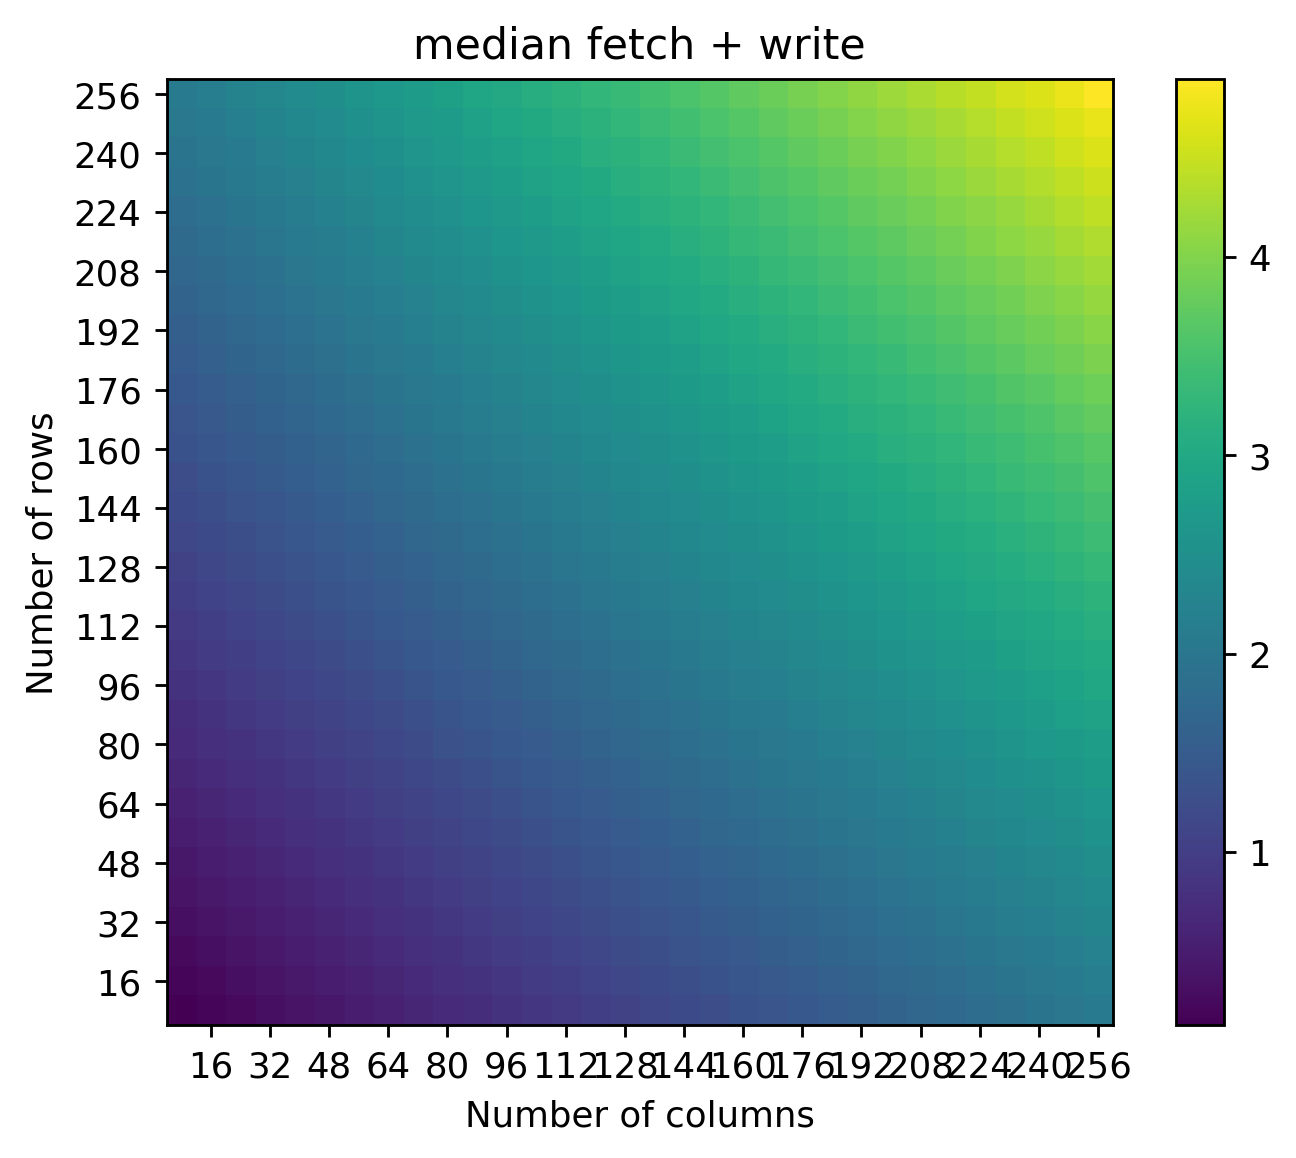

In [4]:
fig, ax = plt.subplots(dpi=256)

c = ax.imshow(op_n_median_array, 
              origin="lower", 
              interpolation='none',
              extent=[columns_min-columns_interval/2,
                      columns_max+columns_interval/2,
                      rows_min-rows_interval/2,
                      rows_max+rows_interval/2,
                      ],
)
plt.title(
    f"median fetch + write"
)
plt.xlabel("Number of columns")
plt.ylabel("Number of rows")
cbar = plt.colorbar(c)

cbar.ax.set_ylabel("")
plt.xticks(range(2*columns_min, columns_max + 1, 2*columns_interval))
plt.yticks(range(2*rows_min, rows_max + 1, 2*rows_interval))

plt.show()